In [324]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np



In [325]:
diabetes=load_diabetes()
df_X=diabetes.data #df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_y=diabetes.target #df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [326]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [327]:
print('<x_data[0]> : ',x_data[0])
print()
print('<y_data[0]> : ',y_data[0] )

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<y_data[0]> :  151.0


In [328]:
print(x_data.shape)
print(y_data.shape)

(442, 10)
(442,)


In [329]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
#(4) train 데이터와 test 데이터로 분리하기

In [330]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (353,)
x_test shape: (89,)
y_train shape: (353,)
y_test shape: (89,)


In [331]:
class MultiLinear:
  def __init__(self,learning_rate=0.001): #입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    self.w=10 #모델의 weight 벡터 self.w=(w_1,w_2) 10개의 열
    self.b=1 #모델의 bias 
#X는 하나의 값이 아닌 12개의 열을 가진 벡터이므로 12개
#b는 상수  b를 없애는 대신 x0=1이라는 상수 x0의 식을 표현
#그러므로 b는 1
    self.lr=learning_rate #모델의 학습률
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트

  def forward(self,x):
    y_pred=np.sum(x*self.w)+self.b #np.sum함수는 인자로 받은 numpy배열의 모든 원소의 합을 return합니다.
    return y_pred

  def loss(self,x,y): #손실함수 정의
    y_pred=self.forward(x)
    return (y_pred-y)**2

  def gradient(self,x,y): #기울기를 구하는 gradient 함수 
    y_pred=self.forward(x)
    w_grad=2*x*(y_pred-y)
    b_grad=2*(y_pred-y)

    return w_grad,b_grad

  def fit(self,x_data,y_data,epochs=20):
    self.w=np.ones(x_data.shape[1]) #모델의 weight들을 전부 1로 초기화
    self.b=0 #모델의 bias를 0으로 초기화
    for epoch in range(epochs):
      l=0 #계산할 손실값 
      w_grad=np.zeros(x_data.shape[1]) #weight의 기울기를 누적할 numpy배열
      b_grad=0  #bias의 기울기를 누적할 변수

      for x,y in zip(x_data,y_data):
        l+=self.loss(x,y)
        w_i,b_i=self.gradient(x,y)

        w_grad+=w_i #weight누적
        b_grad+=b_i #bias누적

      self.w-=self.lr*(w_grad/len(y_data)) #weight 업데이트
      self.b-=self.lr*(b_grad/len(y_data)) #bias 업데이트
 
      print(f'epoch ({epoch+1}) ===> loss : {l/len(y_data):.5f}')
      self.losses.append(l/len(y_data)) #손실값 저장
      self.weight_history.append(self.w) #weight 배열 저장
      self.bias_history.append(self.b) #bias값 저장

In [332]:
#model=MultiLinear(learning_rate=0.001)
#model.fit(x_data,y_data,epochs=40)

epoch (1) ===> loss : 29055.28756
epoch (2) ===> loss : 28962.72419
epoch (3) ===> loss : 28870.53040
epoch (4) ===> loss : 28778.70471
epoch (5) ===> loss : 28687.24565
epoch (6) ===> loss : 28596.15175
epoch (7) ===> loss : 28505.42155
epoch (8) ===> loss : 28415.05360
epoch (9) ===> loss : 28325.04646
epoch (10) ===> loss : 28235.39868
epoch (11) ===> loss : 28146.10882
epoch (12) ===> loss : 28057.17546
epoch (13) ===> loss : 27968.59716
epoch (14) ===> loss : 27880.37252
epoch (15) ===> loss : 27792.50012
epoch (16) ===> loss : 27704.97855
epoch (17) ===> loss : 27617.80641
epoch (18) ===> loss : 27530.98230
epoch (19) ===> loss : 27444.50483
epoch (20) ===> loss : 27358.37262
epoch (21) ===> loss : 27272.58429
epoch (22) ===> loss : 27187.13845
epoch (23) ===> loss : 27102.03376
epoch (24) ===> loss : 27017.26883
epoch (25) ===> loss : 26932.84232
epoch (26) ===> loss : 26848.75287
epoch (27) ===> loss : 26764.99913
epoch (28) ===> loss : 26681.57977
epoch (29) ===> loss : 26598.

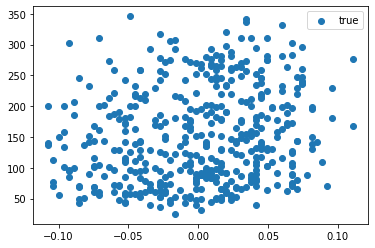

In [333]:
import matplotlib.pyplot as plt 
plt.scatter(x_data[:, 0], y_data, label="true")
plt.legend()
plt.show()

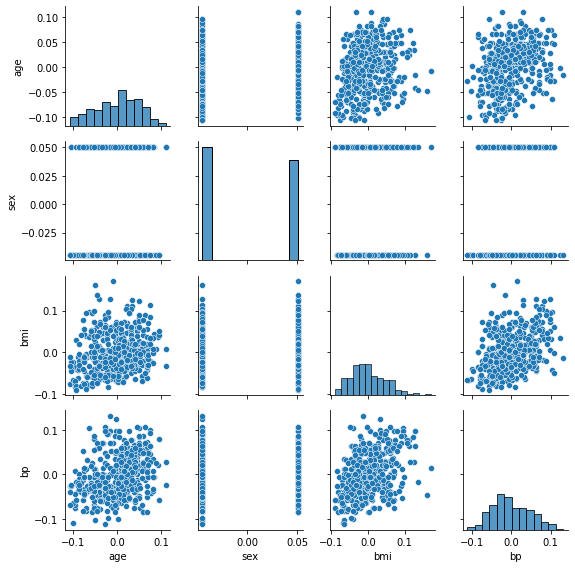

In [334]:
sns.pairplot(data=data.iloc[:, :4], height=2)
plt.tight_layout()
plt.show()

In [337]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

In [344]:
plt.scatter(x_test[:, 0], y_test, label="true")
plt.scatter(x_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed